# EXPLORING USER ENGAGEMENT PATTERNS ON SOCIAL MEDIA

  Objective/Business Problem:
 The objective of this project is to analyze user engagement on social
 media platforms by examining the relationship between users'
 countries, age groups, duration of activity, and the number of likes
 received. The goal is to identify patterns in user duration and likes
 across different countries and age groups, understand how age and
 geographical location influence user activity, and derive insights that
 can help tailor content strategies to maximize user engagement.

 Disclaimer:This Dataset was culled from kaggle.com(An open source data platform)

# **Importing Libraries**

In [ ]:
#Importing Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Dataset**

In [ ]:
#loading the dataset
from google.colab import files
social_media=files.upload()

Saving social_media.csv to social_media.csv


In [ ]:
#reading the dataset
df=pd.read_csv('social_media.csv')

# **Exploratory Data Analysis**

In [ ]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
df.isnull().sum()

,0
UserId,0
UsageDuration,0
Age,0
Country,0
TotalLikes,0


In [ ]:
df.head()

,UserId,UsageDuration,Age,Country,TotalLikes
0,1,2,55,Turkey,5
1,2,6,45,Canada,10
2,3,3,50,Ireland,7
3,4,4,35,South Africa,5
4,5,1,58,Turkey,2


In [ ]:
df.tail()

,UserId,UsageDuration,Age,Country,TotalLikes
58,58,2,51,Turkey,1
59,59,8,19,Germany,15
60,60,2,20,Bulgaria,4
61,61,9,18,Germany,18
62,62,2,52,Panama,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         63 non-null     object
 1   Usage Duration  63 non-null     int64 
 2   Age             63 non-null     int64 
 3   Country         63 non-null     object
 4   TotalLikes      63 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ KB


In [ ]:
df.shape

(63, 5)

In [ ]:
df.describe()

,UserId,UsageDuration,Age,TotalLikes
count,63.000000,63.000000,63.000000,63.000000
mean,31.761905,4.000000,33.777778,5.317460
std,18.015866,2.879292,15.540213,6.135106
min,1.000000,1.000000,18.000000,0.000000
25%,16.500000,2.000000,19.000000,1.500000
50%,32.000000,3.000000,26.000000,4.000000
75%,47.500000,5.000000,50.000000,6.000000
max,62.000000,13.000000,60.000000,28.000000


In [ ]:
df.columns

Index(['UserId', 'UsageDuration', 'Age', 'Country', 'TotalLikes'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

NO DUPLICATES FOUND

In [ ]:
df.columns

Index(['UserId', 'UsageDuration', 'Age', 'Country', 'TotalLikes'], dtype='object')

In [ ]:
df.dtypes

,0
UserId,int64
UsageDuration,int64
Age,int64
Country,object
TotalLikes,int64


# **DATA CLEANING**

In [ ]:
# prompt: Convert User Id data type to object

# Convert 'User ID' column to object data type
df['User ID'] = df['User ID'].astype(object)


In [ ]:
df = df.rename(columns={'UsageDuration': 'Usage Duration'})

In [ ]:
df = df.rename(columns={'UserId': 'User ID'})

In [ ]:
df = df.rename(columns={'TotalLikes': 'Total Likes'})

In [ ]:
df.dtypes


,0
User ID,object
Usage Duration,int64
Age,int64
Country,object
Total Likes,int64


In [ ]:
print("My name is Breezy and a student of FTL COHORT 3")

My name is Breezy and a student of FTL COHORT 3


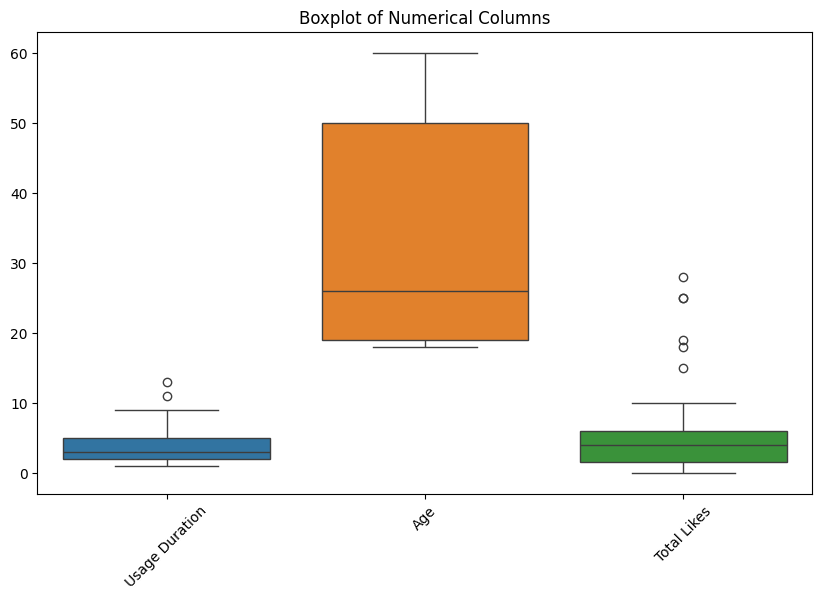

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


The Columns;Usage Duration and Total Likes has Outliers

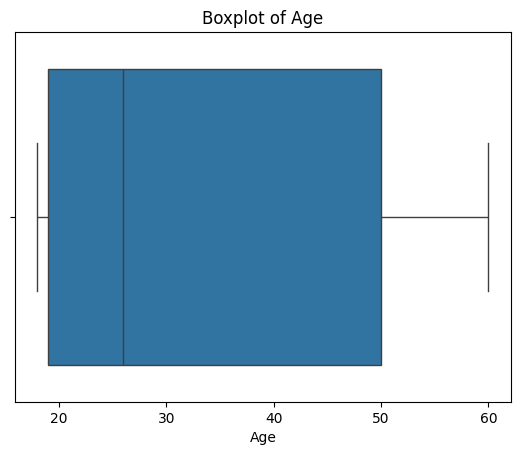

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot for 'Age'
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

Age is the Only Column Without Outliers

In [ ]:
df = df.rename(columns={'TotalLikes': 'Total Likes'})

In [ ]:
def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column using the IQR method.

    Args:
        df: The DataFrame.
        column: The name of the column to remove outliers from.

    Returns:
        The DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from 'Total Likes'
df = remove_outliers_iqr(df, 'Total Likes')

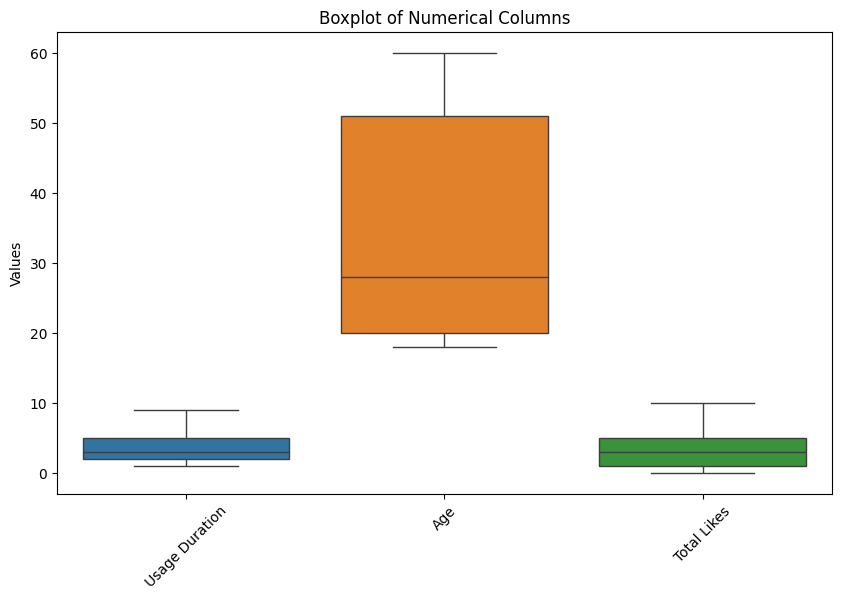

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64','int64']))
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.show()
plt.show()

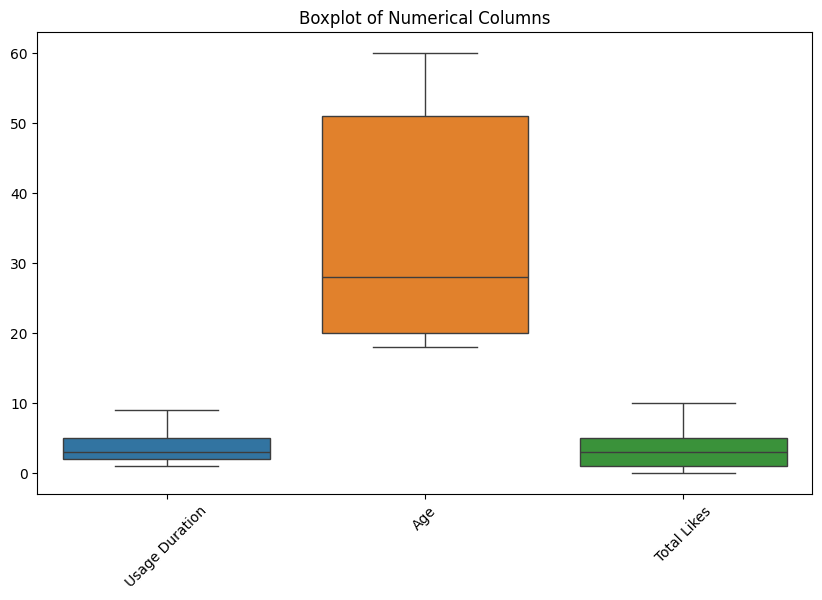

In [ ]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.shape

(57, 5)

In [ ]:
# prompt: rename UserId to User Id

df = df.rename(columns={'UserId': 'User ID'})


In [ ]:
# prompt: rename UsageDuration to Usage Duration

df = df.rename(columns={'UsageDuration': 'Usage Duration'})


# **UNIVARIATE ANALYSIS**

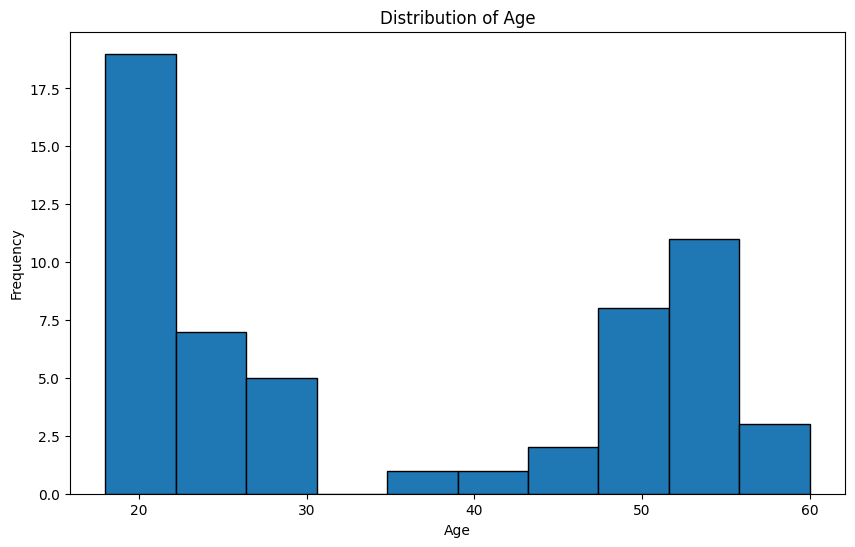

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


Those within Age 20 are the most active users of  Social Media in this data set.

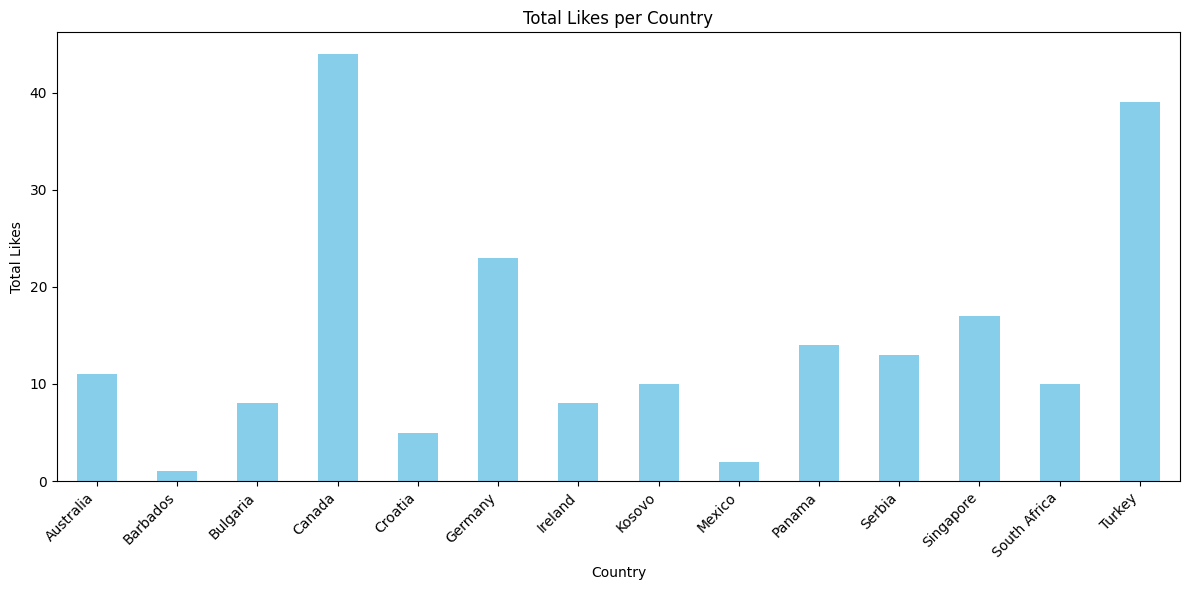

In [ ]:
# prompt: plot a barchart showing the total likes for each country in my data set

import matplotlib.pyplot as plt
# Group by country and sum total likes
country_likes = df.groupby('Country')['Total Likes'].sum()

# Create the bar chart
plt.figure(figsize=(12, 6))
country_likes.plot(kind='bar', color='skyblue')
plt.title('Total Likes per Country')
plt.xlabel('Country')
plt.ylabel('Total Likes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Canada and Turkey are the countries with Social Media Users with the most likes

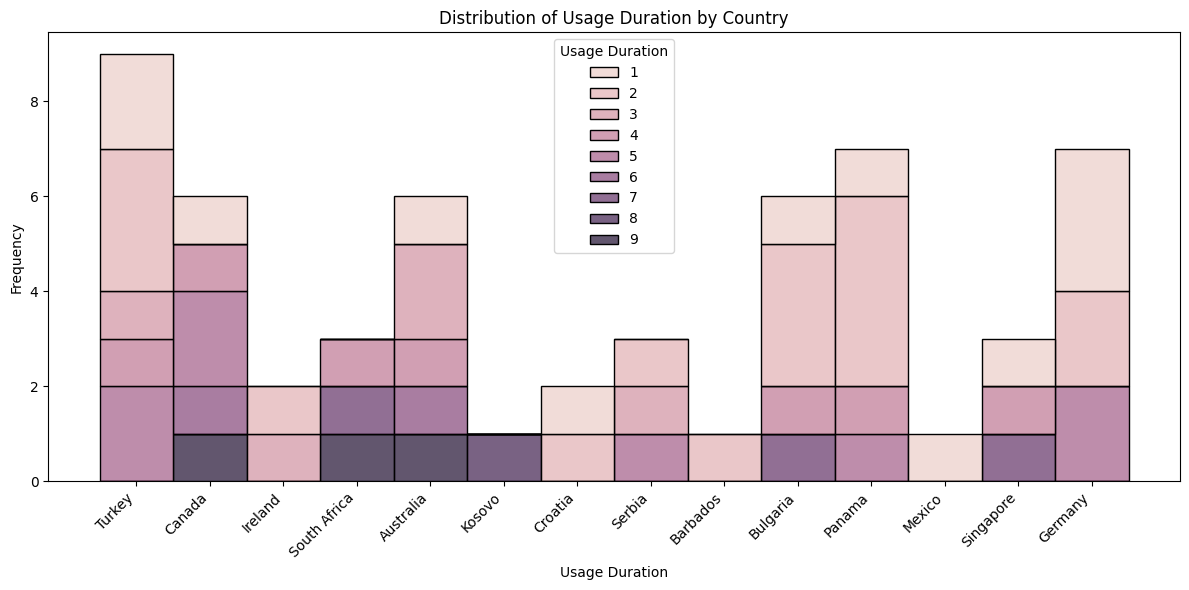

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Country', hue='Usage Duration', multiple='stack', kde=False)
plt.title('Distribution of Usage Duration by Country')
plt.xlabel('Usage Duration')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Turkey is the country with the highest Usage Duration

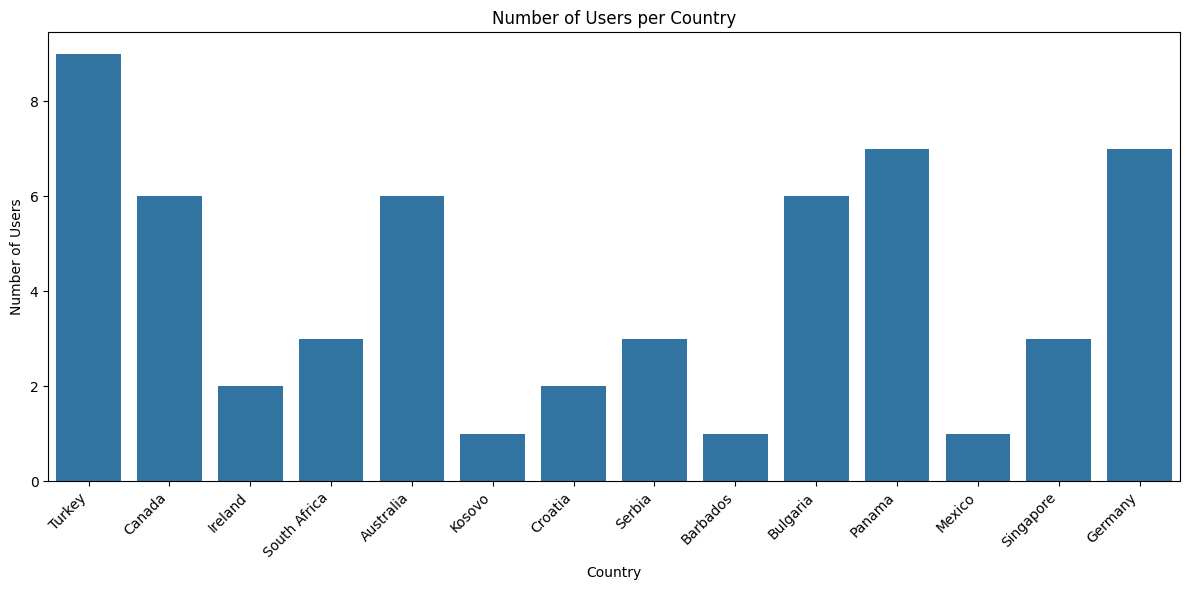

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country')
plt.title('Number of Users per Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Turkey has the highest number of social media users
Mexico has the least number of social media users

# **BIVARIATE ANALYSIS**

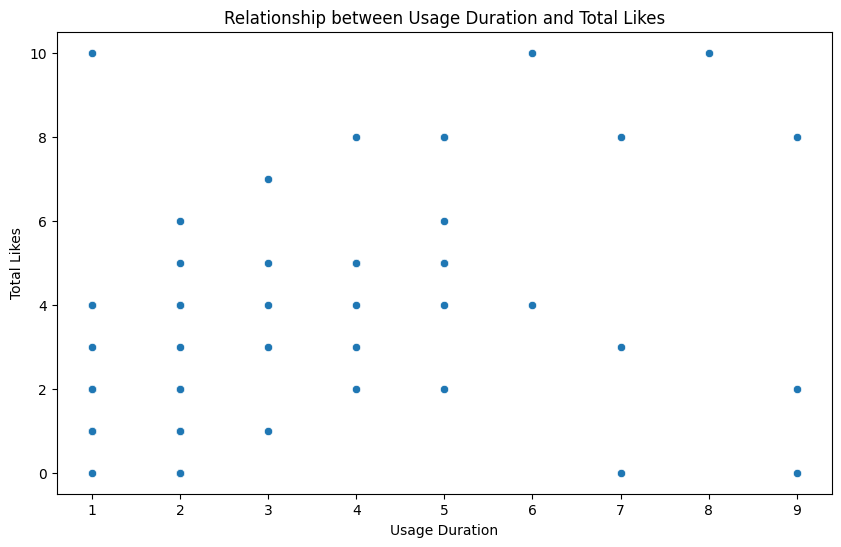

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Usage Duration', y='Total Likes')
plt.title('Relationship between Usage Duration and Total Likes')
plt.xlabel('Usage Duration')
plt.ylabel('Total Likes')
plt.show()


There seems to be a linear relationship between Total Likes and Usage Duration but it ends up being deviated


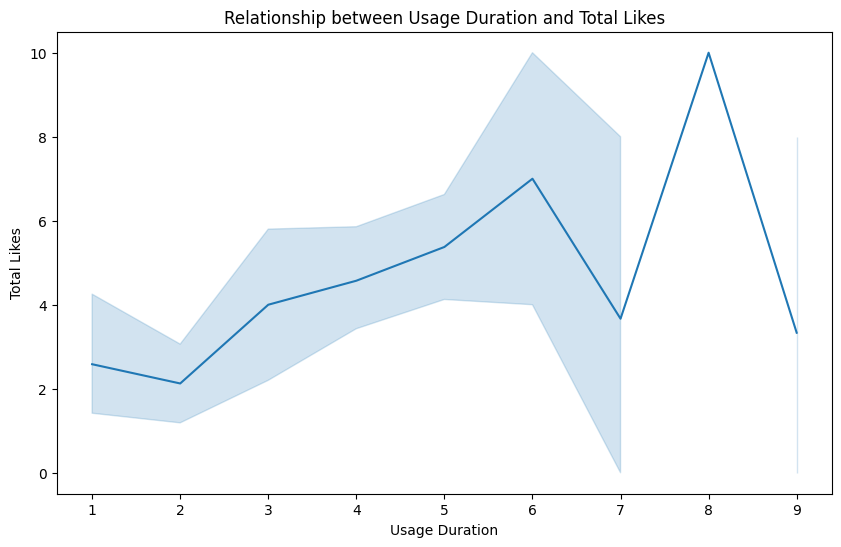

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Usage Duration', y='Total Likes')
plt.title('Relationship between Usage Duration and Total Likes')
plt.xlabel('Usage Duration')
plt.ylabel('Total Likes')
plt.show()


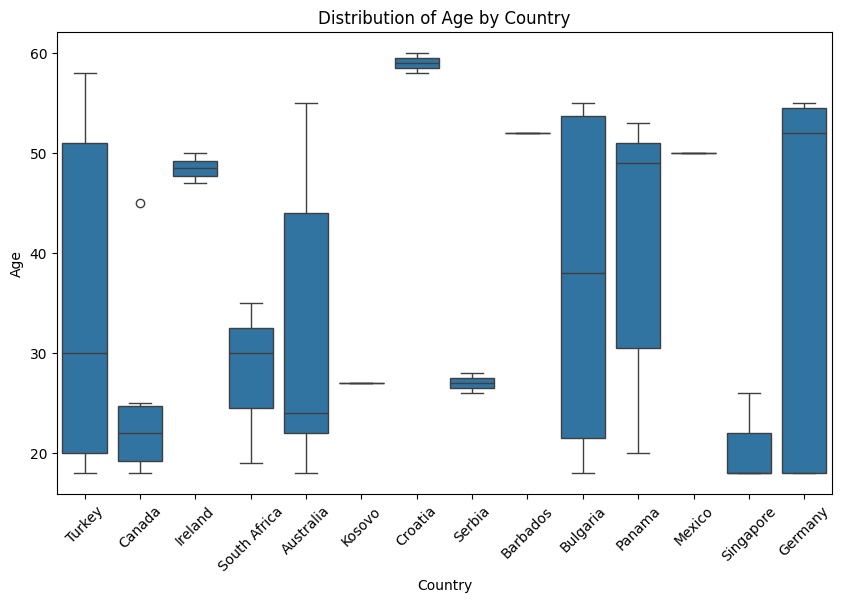

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Age', data=df)
plt.title('Distribution of Age by Country')
plt.xlabel('Country')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


Canada is the Only Column with an Outlier

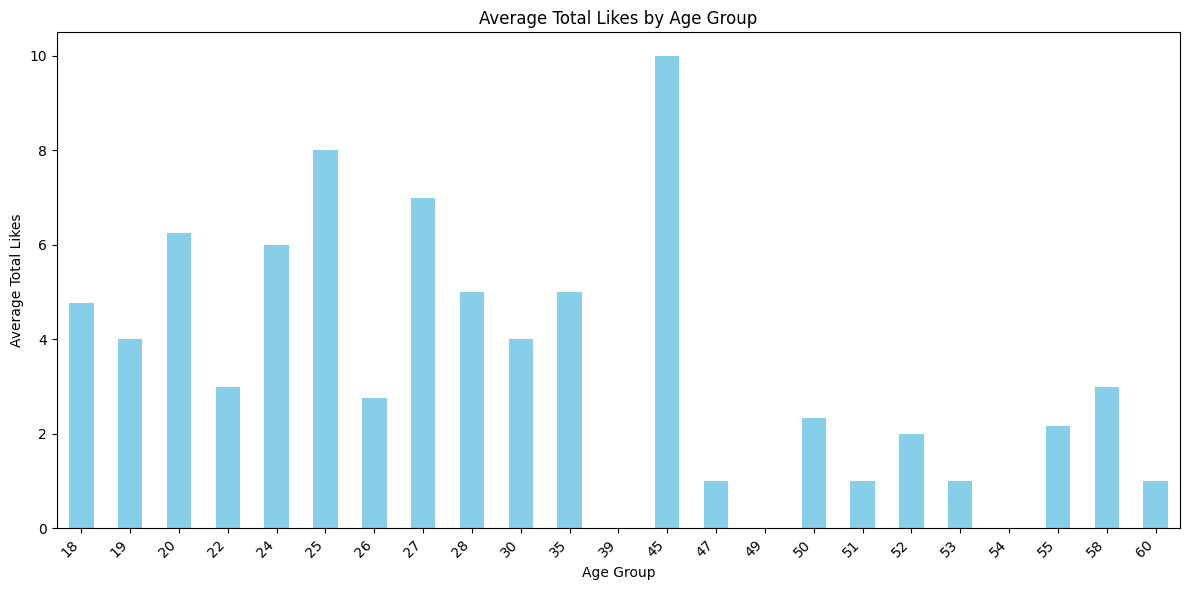

In [ ]:
# Calculate average total likes by age group
average_likes_by_age = df.groupby('Age')['Total Likes'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
average_likes_by_age.plot(kind='bar', color='skyblue')
plt.title('Average Total Likes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Likes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Younger people within the ages of 18-35 had the most likes,which shows they are the users who are most active on social media

# **MULTIVARIATE ANALYSIS**

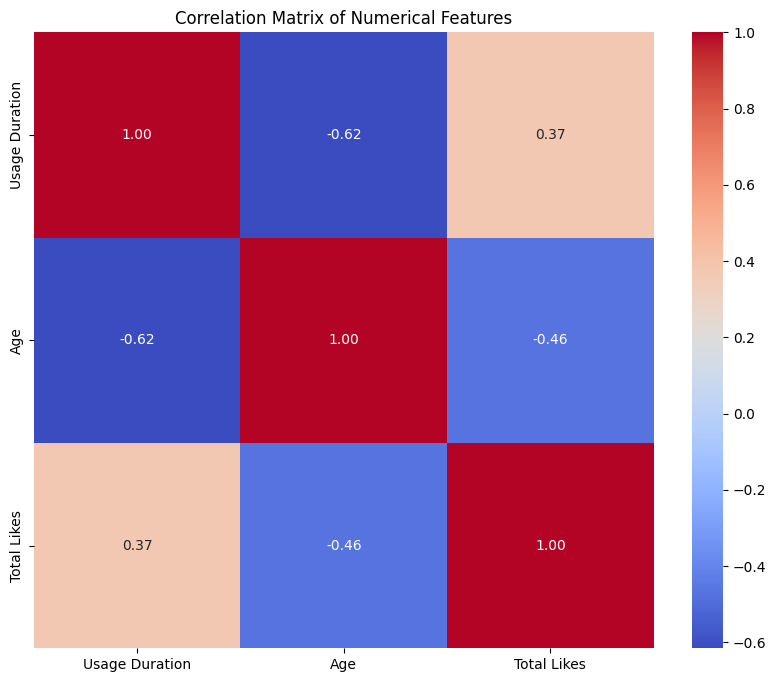

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Total likes and Usage Duration are Slightly Positively correlated,They have a slight linear correlation

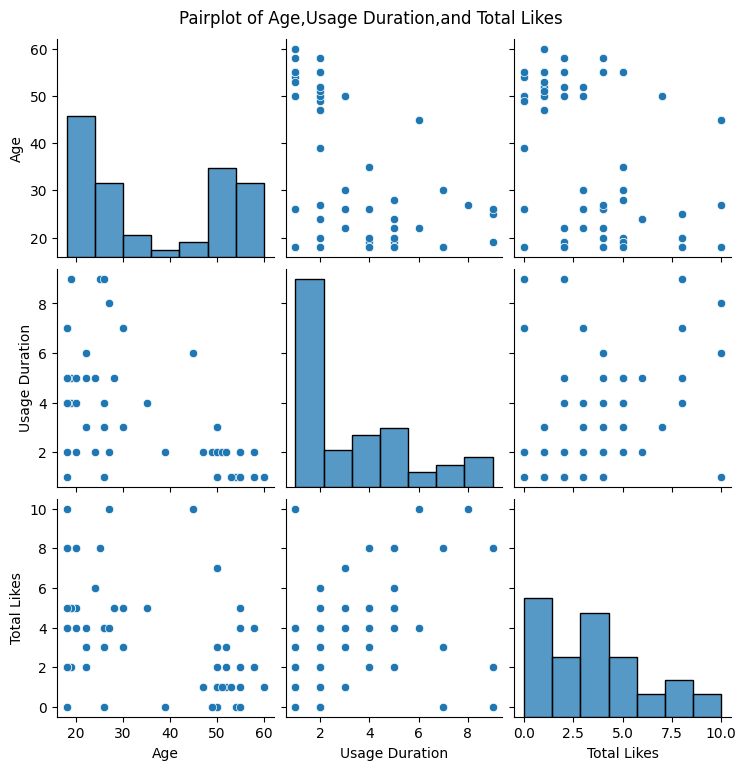

In [ ]:
sns.pairplot(df,vars=['Age','Usage Duration','Total Likes'])
plt.suptitle('Pairplot of Age,Usage Duration,and Total Likes',y=1.02)
plt.show()


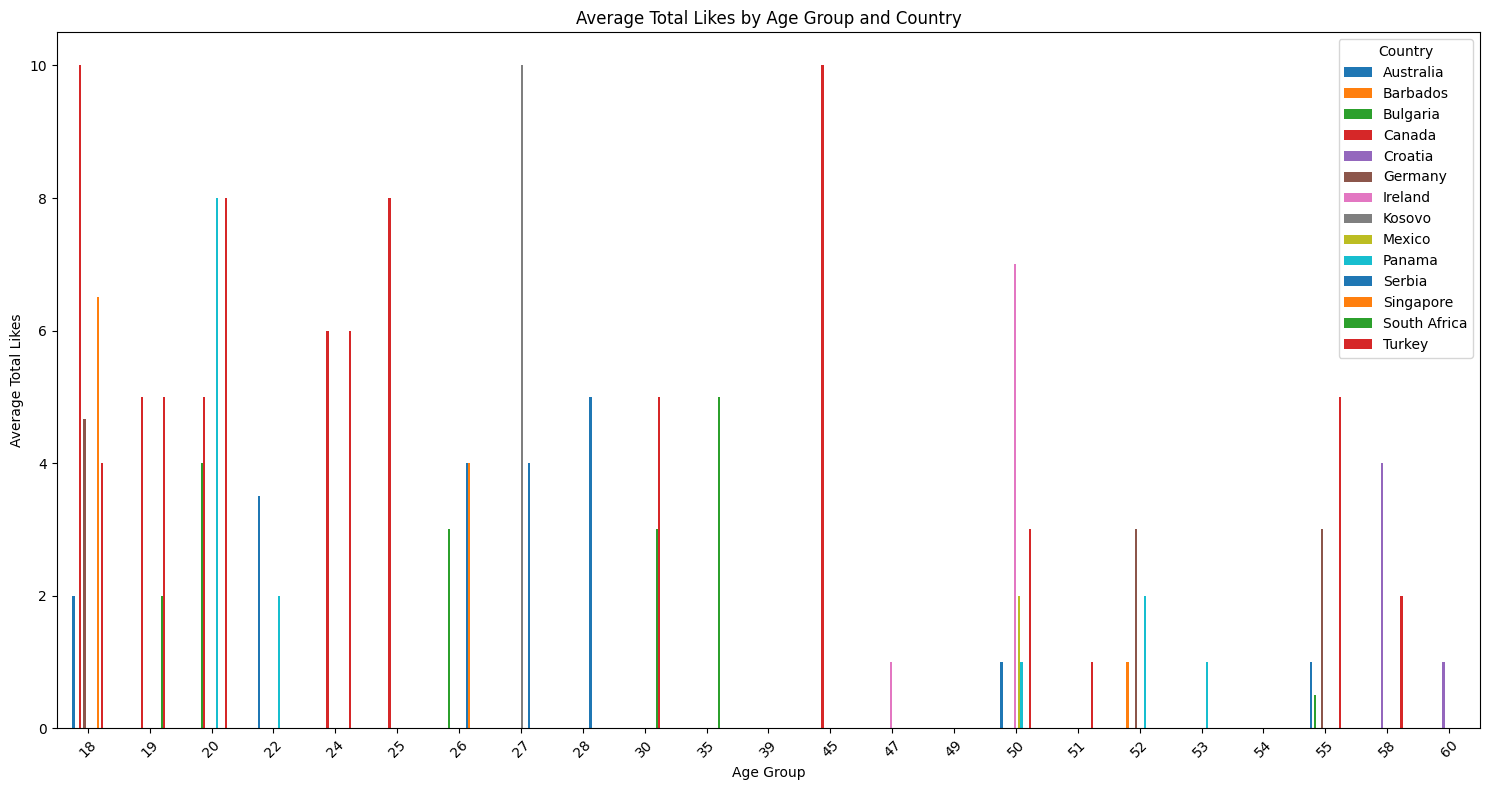

In [ ]:
# Group the data by age group and country, then calculate the average total likes
average_likes = df.groupby(['Age', 'Country'])['Total Likes'].mean().unstack()

# Create the grouped bar plot
average_likes.plot(kind='bar', figsize=(15, 8))
plt.title('Average Total Likes by Age Group and Country')
plt.xlabel('Age Group')
plt.ylabel('Average Total Likes')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


People in Turkey aged 18 and 45 seemed to amass a higher number of likes

# **Conclusions**

In [ ]:
from google.colab import files
df.to_csv('cleaned_social media.csv',index=False)
files.download('cleaned_social media.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Insights Culled From These Dataset:

 Those within Age 20 are the most active users of Social Media in this data set

 Canada and Turkey are the countries with Social Media Users with the most likes

 Turkey is the country with the highest Usage Duration

 Turkey has the highest number of social media users Mexico has the least number of social media users


